<a href="https://colab.research.google.com/github/BMac23/Mat421/blob/main/Section_22_1%2C_22_2%2C_22_3_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ordinary Differential Equations (ODEs)

Ordinary Differential Equations (ODEs) are equations that involve functions and their derivatives. An ODE describes the relationship between a function $y(x)$, which is dependent on an independent variable $x$, and its derivatives. The general form of an $n$-th order ODE is given by:

\begin{equation}
    F\left(x, y, \frac{dy}{dx}, \frac{d^2y}{dx^2}, \ldots, \frac{d^n y}{dx^n}\right) = 0,
\end{equation}

where $F$ is a function that combines these elements in some manner.

## Pendulums and Initial Value Problems

Consider a pendulum with length $l$ and mass $m$ at its end. The angle $\Theta(t)$ it makes with the vertical in the presence of gravity $g$ satisfies the ODE:

\begin{equation}
    ml\frac{d^2\Theta(t)}{dt^2} = -mg\sin(\Theta(t)).
\end{equation}

This equation is derived by considering the forces acting on the pendulum and transforming them into polar coordinates.

For small angles $\Theta(t)$, the pendulum equation simplifies to:

\begin{equation}
    l\frac{d^2\Theta(t)}{dt^2} = -g\Theta(t).
\end{equation}

## Reduction of Order
Reduction of order is a powerful technique for solving second-order ordinary differential equations (ODEs) when one solution $y_1(x)$ is already known. This method transforms the original second-order ODE into a first-order ODE, making it simpler to solve.

Consider a second-order linear homogeneous ODE of the form:

\begin{equation}
    y'' + p(x)y' + q(x)y = 0,
\end{equation}

where $y''$ denotes the second derivative of $y$ with respect to $x$, and $p(x)$ and $q(x)$ are known functions.

Suppose $y_1(x)$ is a known solution to this ODE. The goal is to find a second, linearly independent solution $y_2(x)$. We assume that $y_2(x)$ can be represented as $y_2(x) = v(x)y_1(x)$, where $v(x)$ is an unknown function to be determined.

Substituting $y_2(x)$ into the original ODE and applying the product rule for differentiation leads to a first-order ODE in terms of $v'(x)$:

\begin{equation}
    v''y_1 + 2v'y_1' + v(y_1'' + p(x)y_1' + q(x)y_1) = 0.
\end{equation}

Since $y_1(x)$ is a solution to the original ODE, the term $y_1'' + p(x)y_1' + q(x)y_1$ equals zero, simplifying the equation to:

\begin{equation}
    v''y_1 + 2v'y_1' = 0.
\end{equation}

This can be further simplified by introducing a substitution $u = v'$, reducing the problem to a first-order ODE in terms of $u$:

\begin{equation}
    u'y_1 + 2u y_1' = 0,
\end{equation}

which can be solved to find $u(x)$, and subsequently $v(x)$ by integration, leading to the second solution $y_2(x)$.


In [1]:
import sympy as sp

In [2]:
x = sp.symbols('x')
y = sp.Function('y')(x)

# Known solution y1 and its derivative
y1 = sp.exp(x)
y1_prime = sp.diff(y1, x)

v = sp.Function('v')(x)
y2 = v * y1

In [3]:
# Derivatives of y2
y2_prime = sp.diff(y2, x)
y2_double_prime = sp.diff(y2_prime, x)

# Original ODE: y'' + p(x)*y' + q(x)*y = 0
# Let's assume p(x) = 0 and q(x) = -1 for demonstration
p = 0
q = -1
ode = y2_double_prime + p * y2_prime + q * y2

reduced_ode = ode.subs({y2_double_prime: y2_double_prime, y2_prime: y2_prime, y2: y2}).doit()


In [4]:
v_prime = sp.Function('v_prime')(x)
equation = reduced_ode.subs(sp.diff(v, x), v_prime).simplify()
solution = sp.dsolve(equation, v_prime)

print(f'Reduced ODE: {equation}')
print(f'Solution for v\': {solution}')

Reduced ODE: (2*v_prime(x) + Derivative(v_prime(x), x))*exp(x)
Solution for v': Eq(v_prime(x), C1*exp(-2*x))


## Euler's Method

Euler's Method is a first-order numerical procedure for solving ordinary differential equations (ODEs) with a given initial value. It is named after the Swiss mathematician Leonhard Euler, who introduced the method in the 18th century. The method approximates the solution of the initial value problem:

\begin{equation}
    \frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0,
\end{equation}

where $f(x, y)$ is a given function that defines the derivative of $y$ with respect to $x$, and $(x_0, y_0)$ is the initial condition.

The main idea behind Euler's Method is to use the slope of the tangent line at the known point to estimate the value of the function at the next point. The process is repeated iteratively to approximate the solution over a range of $x$ values.

Given a step size $h$, which determines the interval between successive $x$ values, the algorithm can be described by the formula:

\begin{equation}
    y_{n+1} = y_n + h \cdot f(x_n, y_n),
\end{equation}

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# The ODE
def f(x, y):
    return -2 * y

# Euler's method
def euler_method(f, x0, y0, h, n):
    x = np.zeros(n)
    y = np.zeros(n)
    x[0], y[0] = x0, y0

    for i in range(1, n):
        x[i] = x[i-1] + h
        y[i] = y[i-1] + h * f(x[i-1], y[i-1])

    return x, y

# Analytical solution
def analytical_solution(x):
    return np.exp(-2 * x)

In [7]:
x0 = 0
y0 = 1
h = 0.1
n = 21

x_euler, y_euler = euler_method(f, x0, y0, h, n)

In [8]:
x_analytical = np.linspace(x0, 2, 100)
y_analytical = analytical_solution(x_analytical)

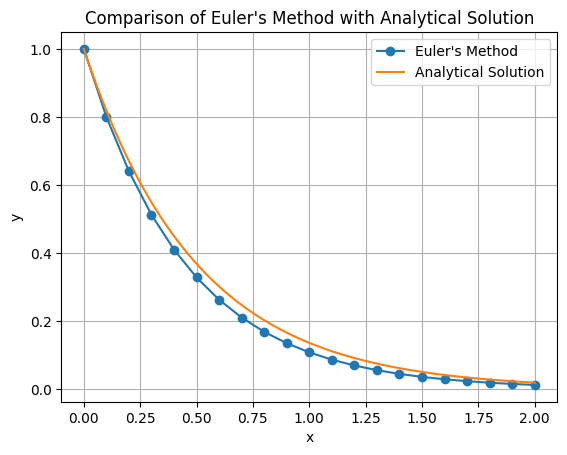

In [9]:
plt.plot(x_euler, y_euler, 'o-', label='Euler\'s Method')
plt.plot(x_analytical, y_analytical, '-', label='Analytical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Euler\'s Method with Analytical Solution')
plt.legend()
plt.grid(True)
plt.show()